<a href="https://colab.research.google.com/github/chaithra6667/smoke-detection/blob/main/SMOKE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
smoke = pd.read_csv("/content/smoke_detection_iot1.csv")
smoke.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47116 entries, 0 to 47115
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      47116 non-null  int64  
 1   UTC             47116 non-null  int64  
 2   Temperature[C]  47116 non-null  float64
 3   Humidity[%]     47116 non-null  float64
 4   TVOC[ppb]       47116 non-null  int64  
 5   eCO2[ppm]       47116 non-null  int64  
 6   Raw H2          47116 non-null  int64  
 7   Raw Ethanol     47116 non-null  int64  
 8   Pressure[hPa]   47116 non-null  float64
 9   PM1.0           47116 non-null  float64
 10  PM2.5           47116 non-null  float64
 11  NC0.5           47116 non-null  float64
 12  NC1.0           47116 non-null  float64
 13  NC2.5           47116 non-null  float64
 14  CNT             47116 non-null  int64  
 15  Fire Alarm      47116 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 5.8 MB


In [ ]:
smoke.drop(['Unnamed: 0', 'UTC'], axis = 1, inplace = True)

In [ ]:
Total = smoke.isnull().sum().sort_values(ascending = False)          
Percent = (smoke.isnull().sum()*100/smoke.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values']) 
missing_data

,Total,Percentage of Missing Values
Temperature[C],0,0.0
Humidity[%],0,0.0
TVOC[ppb],0,0.0
eCO2[ppm],0,0.0
Raw H2,0,0.0
Raw Ethanol,0,0.0
Pressure[hPa],0,0.0
PM1.0,0,0.0
PM2.5,0,0.0
NC0.5,0,0.0


In [ ]:
smoke.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature[C],47116.0,18.732437,14.510472,-22.010,16.9915,23.690,26.460,59.930
Humidity[%],47116.0,47.567512,9.853583,10.740,47.1400,49.590,53.150,75.200
TVOC[ppb],47116.0,2280.413214,8977.994122,0.000,76.0000,365.000,1210.000,60000.000
eCO2[ppm],47116.0,734.007068,2192.694755,400.000,400.0000,400.000,425.000,60000.000
Raw H2,47116.0,12947.339609,305.851245,10668.000,12823.0000,12954.000,13126.000,13803.000
Raw Ethanol,47116.0,19812.754839,680.263190,15317.000,19432.0000,19826.000,20171.000,21410.000
Pressure[hPa],47116.0,938.501117,1.503981,930.852,937.5560,938.775,939.605,939.861
PM1.0,47116.0,133.162476,1061.603662,0.000,1.0800,1.790,2.090,14333.690
PM2.5,47116.0,244.631547,2275.360419,0.000,1.1375,1.870,2.170,45432.260
NC0.5,47116.0,649.470781,4907.809322,0.000,7.4600,12.350,14.370,61482.030


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-8-4ffc6fe50d22>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])
<ipython-input-8-4ffc6fe50d22>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])
<ipython-input-8-4ffc6fe50d22>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])
<ipython-input-8-4ffc6fe50d22>:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will be

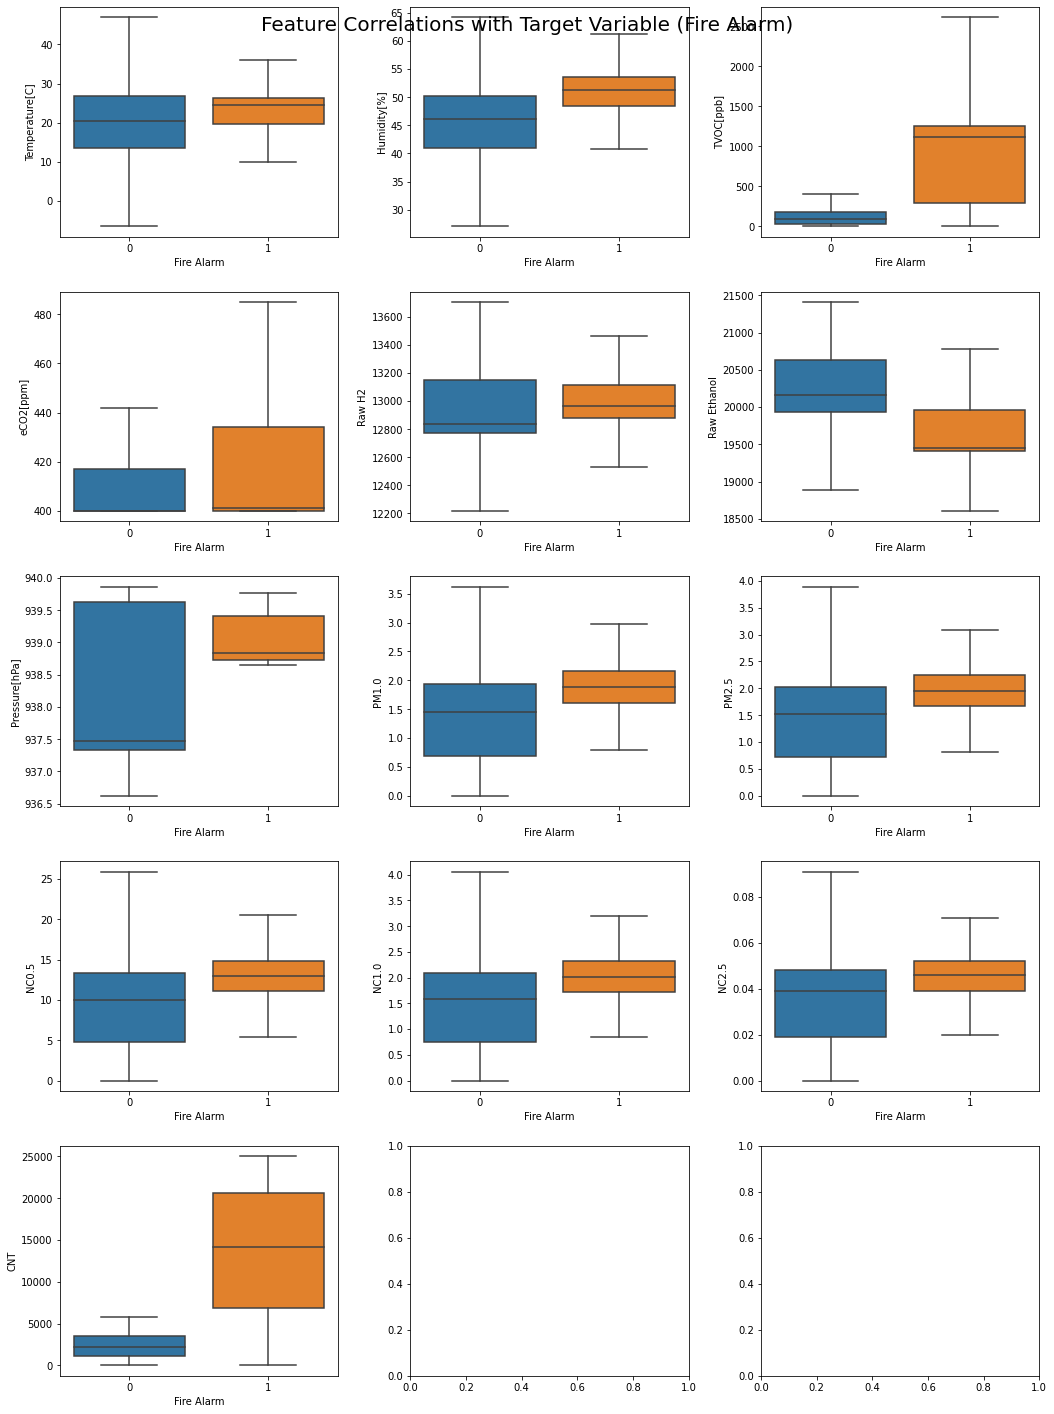

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 20))

for feature, subplot in zip(smoke, ax.flatten()):
    if feature == 'Fire Alarm':
        continue
    sns.boxplot(x = smoke['Fire Alarm'], y = smoke[feature], showfliers = False, ax = subplot)
    subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])

plt.suptitle('Feature Correlations with Target Variable (Fire Alarm)', fontsize = 20)
plt.tight_layout(pad = 2)
plt.show()

In [ ]:
corr = smoke.corr()
corr

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
Temperature[C],1.000000,-0.182589,0.059265,0.068104,-0.123644,-0.060702,-0.200017,0.019043,0.016313,0.020100,0.016066,0.012927,-0.078961,-0.051850
Humidity[%],-0.182589,1.000000,-0.492846,-0.373550,0.266691,0.097853,0.694625,-0.233965,-0.175877,-0.275557,-0.171200,-0.115376,0.257082,0.368045
TVOC[ppb],0.059265,-0.492846,1.000000,0.604812,-0.671241,-0.706668,-0.209822,0.595716,0.475581,0.669273,0.465536,0.342908,-0.051733,-0.201690
eCO2[ppm],0.068104,-0.373550,0.604812,1.000000,-0.699900,-0.533239,-0.323760,0.664550,0.571606,0.698763,0.563160,0.455222,-0.099243,-0.081499
Raw H2,-0.123644,0.266691,-0.671241,-0.699900,1.000000,0.627452,0.307016,-0.548043,-0.445056,-0.606938,-0.436322,-0.328800,0.003123,0.130421
Raw Ethanol,-0.060702,0.097853,-0.706668,-0.533239,0.627452,1.000000,-0.071247,-0.508120,-0.415909,-0.558913,-0.408030,-0.310642,-0.478578,-0.310377
Pressure[hPa],-0.200017,0.694625,-0.209822,-0.323760,0.307016,-0.071247,1.000000,-0.254334,-0.239438,-0.243344,-0.237594,-0.210812,0.202606,0.207788
PM1.0,0.019043,-0.233965,0.595716,0.664550,-0.548043,-0.508120,-0.254334,1.000000,0.956009,0.939810,0.949739,0.854679,-0.086995,-0.094867
PM2.5,0.016313,-0.175877,0.475581,0.571606,-0.445056,-0.415909,-0.239438,0.956009,1.000000,0.798235,0.999786,0.969369,-0.078302,-0.070575
NC0.5,0.020100,-0.275557,0.669273,0.698763,-0.606938,-0.558913,-0.243344,0.939810,0.798235,1.000000,0.785609,0.625842,-0.087426,-0.112592


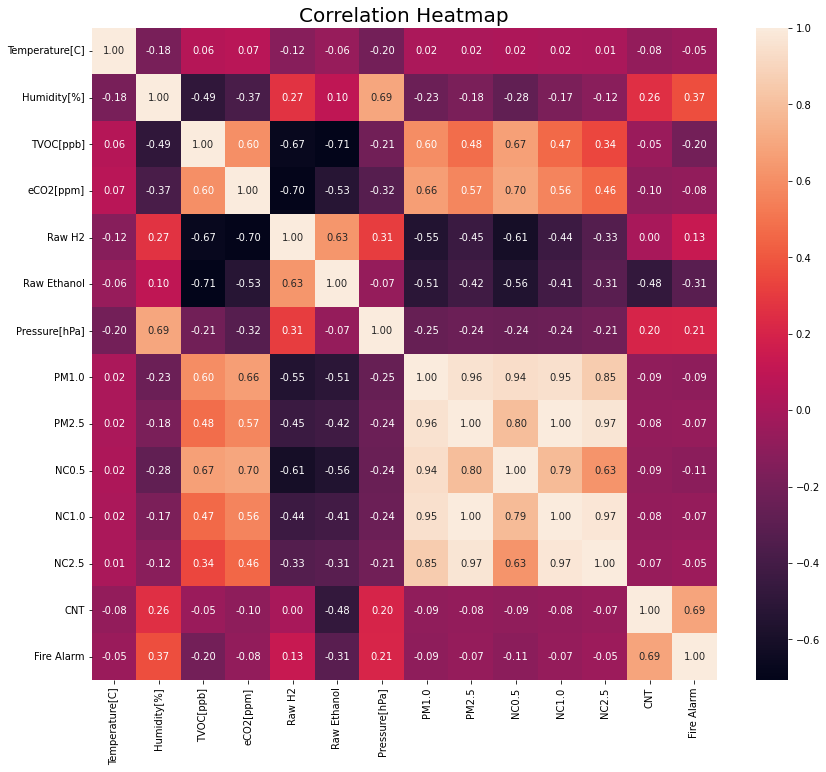

In [ ]:
plt.figure(figsize = (14, 12))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

In [ ]:
y = smoke['Fire Alarm']
x = smoke.drop('Fire Alarm', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37692, 13), (9424, 13), (37692,), (9424,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

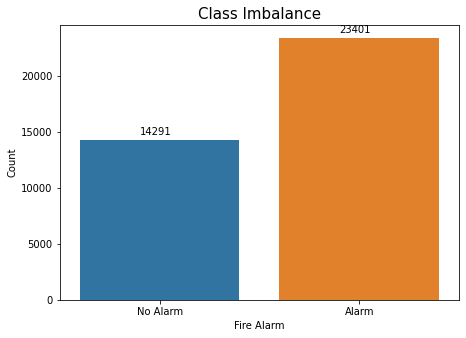

In [ ]:
sns.countplot(x = y_train)
plt.text(x = 0 - 0.1, y = y_train.value_counts()[0] + 500, s = y_train.value_counts()[0])
plt.text(x = 1 - 0.1, y = y_train.value_counts()[1] + 500, s = y_train.value_counts()[1])
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Count')
plt.tight_layout(pad = -1)
plt.title('Class Imbalance', fontsize = 15)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm, 
                               columns = ['Predicted: No Alarm', 'Predicted: Alarm'], 
                               index = ['Actual: No Alarm', 'Actual: Alarm'])
    sns.heatmap(conf_matrix, annot = True, cbar = False, fmt = 'd', linewidth = 0.5, annot_kws = {'size': 25})
    plt.xticks()
    plt.yticks()
    plt.title(model_name + " Confusion Matrix", fontsize = 20)
    plt.show()
score_card = pd.DataFrame(columns = ['Model', 'Precision Score', 'Recall Score', 'f1-Score', 'AUC Score', 'Accuracy Score'])
index_iter = iter(range(1, 10))
def update_score_card(y_test, y_pred, model_name):
    global score_card
    new_score = pd.DataFrame({'Model': model_name, 
                              'Precision Score': metrics.precision_score(y_test, y_pred), 
                              'Recall Score': metrics.recall_score(y_test, y_pred), 
                              'f1-Score': metrics.f1_score(y_test, y_pred), 
                              'AUC Score': roc_auc_score(y_test, y_pred), 
                              'Accuracy Score':metrics.accuracy_score(y_test, y_pred)}, 
                             index = [next(index_iter)])
    score_card = pd.concat([score_card, new_score])
    return score_card

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3582
           1       1.00      1.00      1.00      5842

    accuracy                           1.00      9424
   macro avg       1.00      1.00      1.00      9424
weighted avg       1.00      1.00      1.00      9424



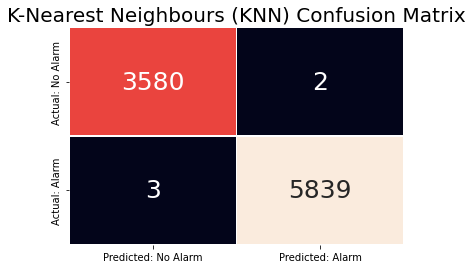

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score
1,K-Nearest Neighbours (KNN),0.999658,0.999486,0.999572,0.999464,0.999469


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
plot_confusion_matrix(y_test, y_pred_knn, 'K-Nearest Neighbours (KNN)')

update_score_card(y_test, y_pred_knn, 'K-Nearest Neighbours (KNN)')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3582
           1       1.00      1.00      1.00      5842

    accuracy                           1.00      9424
   macro avg       1.00      1.00      1.00      9424
weighted avg       1.00      1.00      1.00      9424



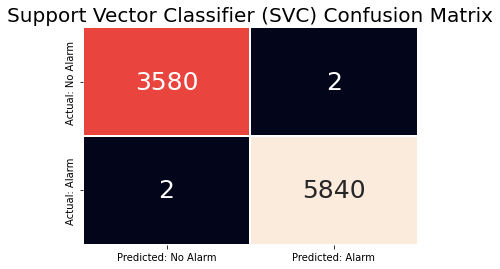

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score
1,K-Nearest Neighbours (KNN),0.999658,0.999486,0.999572,0.999464,0.999469
2,Support Vector Classifier (SVC),0.999658,0.999658,0.999658,0.999550,0.999576


In [ ]:
search_parameters = { 
    'gamma' : ['scale', 'auto'],
    'C': [12, 13, 14]
}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_init = SVC(kernel = 'rbf')
svc_grid = GridSearchCV(estimator = svc_init, param_grid = search_parameters, scoring = 'accuracy', cv = 5)
svc_grid.fit(X_train, y_train)
svc_grid.best_params_
svc = SVC(kernel = 'rbf', gamma = svc_grid.best_params_['gamma'], C = svc_grid.best_params_['C'])
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))
plot_confusion_matrix(y_test, y_pred_svc, 'Support Vector Classifier (SVC)')
update_score_card(y_test, y_pred_svc, 'Support Vector Classifier (SVC)')